# Planar flows

This notebook is very much a work in progress, but is aimed to be an introduction to normalising flows, here exemplified by the planar flow. This is often one of the first normalising flows that newcomers to the field are introduced to, as the planar flow is described in the (by now) classic paper [*Normalizing Flows for Variational Inference*](https://arxiv.org/pdf/1505.05770.pdf) by D. Rezende and S. Mohamed.

The planar flow also serves well for building intuition about normalising flows, as it is very suitable for visualising how a normalising flow transforms the base density by repeatedly applying simple transformations of the (in this case) two-dimensional space. 

In [1]:
import torch
import matplotlib.pyplot as plt

from models.PlanarFlowVI import Planar
from target_distribution import TargetDistribution
from utils.VariationalBound import binary_loss_function 
from utils.plot import plot_available_distributions, plot_comparison

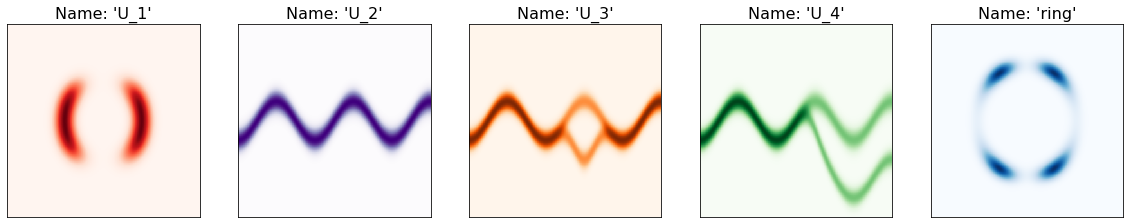

In [2]:
# Plot available distributions.
plot_available_distributions()

In [3]:
# Parameters.
target_distr = "U_1"  
flow_length = 32  
num_batches = 20000  
batch_size = 128 
lr = 6e-4  
axlim = 7 

In [4]:
# Initialise model, loss, and optimiser. 
model = Planar(K=flow_length)
optimiser = torch.optim.Adam(model.parameters(), lr=lr)
density = TargetDistribution(target_distr)

In [5]:
# Train model. 
for batch_num in range(1, num_batches + 1):
    # Get batch from N(0,I).
    batch = torch.zeros(size=(batch_size, 2)).normal_(mean=0, std=1)
    # Pass batch through flow.
    zk, log_jacobians = model(batch)
    # Compute loss under target distribution.
    loss = binary_loss_function(density, batch, zk, log_jacobians) #new
    
    # Train. 
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

    if batch_num % 1000 == 0:
        print(f"(batch_num {batch_num:05d}/{num_batches}) loss: {loss}")

(batch_num 01000/10000) loss: 0.23967604339122772
(batch_num 02000/10000) loss: -1.355502724647522
(batch_num 03000/10000) loss: -1.7102789878845215
(batch_num 04000/10000) loss: -1.7573496103286743
(batch_num 05000/10000) loss: -1.8005783557891846
(batch_num 06000/10000) loss: -1.7724518775939941
(batch_num 07000/10000) loss: -1.845062255859375
(batch_num 08000/10000) loss: -1.803514838218689
(batch_num 09000/10000) loss: -1.8377617597579956
(batch_num 10000/10000) loss: -1.844845175743103


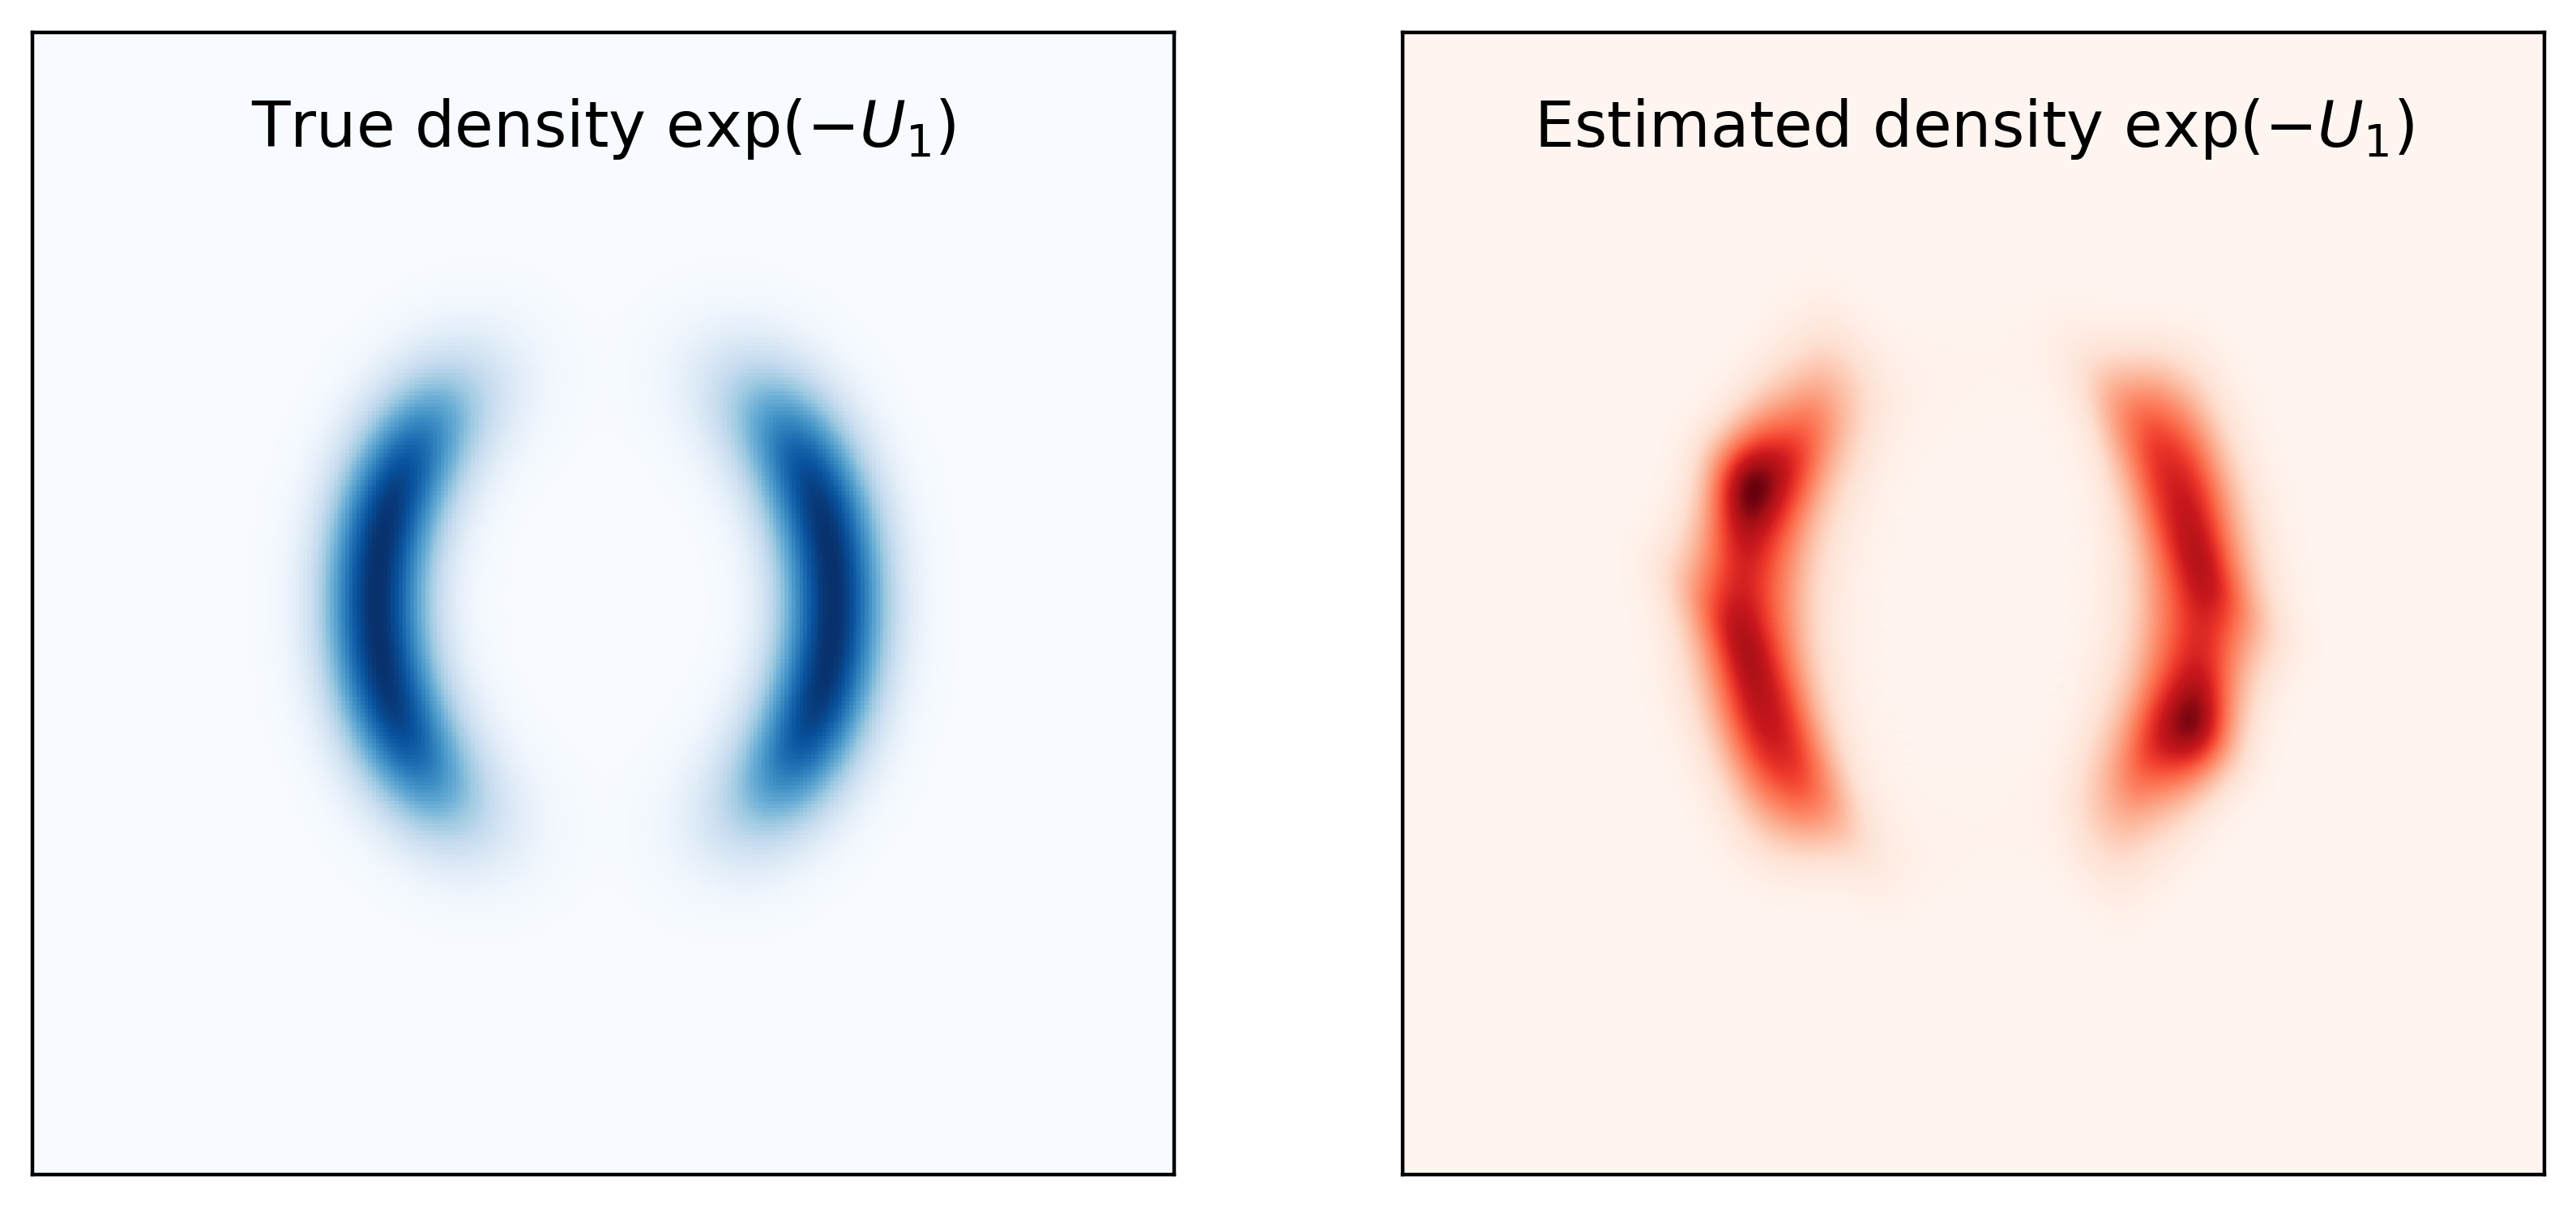

In [7]:
# Plot true and estimated denisty side by side. 
plot_comparison(model, target_distr, flow_length)